In [55]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.utils import all_estimators
import warnings
warnings.filterwarnings('ignore')

In [56]:
diabetes = pd.read_csv("C:/Users/진현킴/Downloads/diabetes.csv")

In [57]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [58]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in diabetes.columns :
    diabetes[i] = le.fit_transform(diabetes[i])

In [59]:
 diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,86,22,28,0,123,350,29,1
1,1,23,19,22,0,62,196,10,0
2,8,121,17,0,0,30,368,11,1
3,1,27,19,16,62,77,53,0,0
4,0,75,4,28,102,209,514,12,1
...,...,...,...,...,...,...,...,...,...
763,10,39,25,41,108,118,55,42,0
764,2,60,21,20,0,155,187,6,0
765,5,59,22,16,71,58,115,9,0
766,1,64,14,0,0,95,195,26,1


In [60]:
y = diabetes['Outcome']

y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [64]:
X = diabetes.iloc[:,0:8].values

In [75]:
from sklearn.preprocessing import LabelEncoder
## from keras.utils import to_categorical

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
## y_one_hot = to_categorical(y_encoded, num_classes=2)
Y = pd.get_dummies(y_encoded).values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [76]:
print(y_train.shape)
print(y_test.shape)

(614, 2)
(154, 2)


In [97]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam


model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.compile(Adam(lr=0.0001),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 10)                90        
                                                                 
 dense_42 (Dense)            (None, 7)                 77        
                                                                 
 dense_43 (Dense)            (None, 4)                 32        
                                                                 
 dense_44 (Dense)            (None, 2)                 10        
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model_history=model.fit(x = X_train, y = y_train, epochs=100, batch_size=32, validation_data = (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/100
20/20 [==============================] - 1s 9ms/step - loss: 0.6765 - accuracy: 0.6645 - val_loss: 0.6685 - val_accuracy: 0.6948
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6748 - accuracy: 0.6792 - val_loss: 0.6661 - val_accuracy: 0.7208
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6731 - accuracy: 0.6792 - val_loss: 0.6639 - val_accuracy: 0.7403
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6714 - accuracy: 0.6792 - val_loss: 0.6616 - val_accuracy: 0.7597
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6698 - accuracy: 0.6873 - val_loss: 0.6597 - val_accuracy: 0.7597
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6682 - accuracy: 0.6873 - val_loss: 0.6575 - val_accuracy: 0.7792
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.6857 - val_loss: 0.6554 - val_accuracy: 0.7727
Epoch 8/100
2

Epoch 59/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5866 - accuracy: 0.7052 - val_loss: 0.5545 - val_accuracy: 0.7662
Epoch 60/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5852 - accuracy: 0.7068 - val_loss: 0.5529 - val_accuracy: 0.7662
Epoch 61/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5838 - accuracy: 0.7052 - val_loss: 0.5511 - val_accuracy: 0.7662
Epoch 62/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5823 - accuracy: 0.7085 - val_loss: 0.5491 - val_accuracy: 0.7662
Epoch 63/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5808 - accuracy: 0.7085 - val_loss: 0.5474 - val_accuracy: 0.7792
Epoch 64/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5793 - accuracy: 0.7085 - val_loss: 0.5454 - val_accuracy: 0.7792
Epoch 65/100
20/20 [==============================] - 0s 2ms/step - loss: 0.5777 - accuracy: 0.7166 - val_loss: 0.5437 - val_accuracy: 0.7792
Epoch 

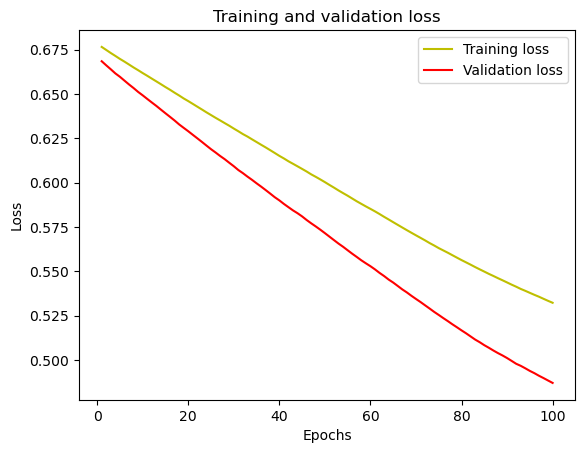

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

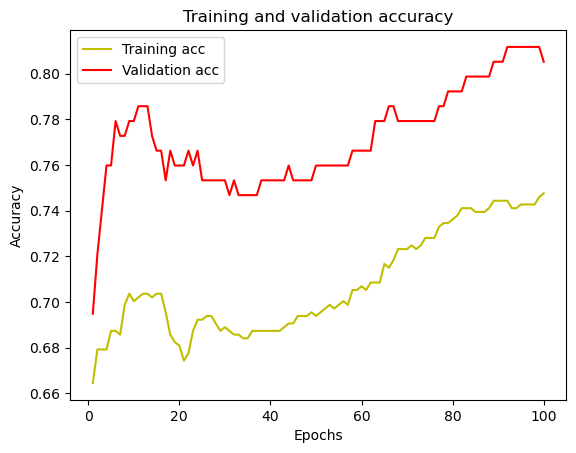

In [100]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [101]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       107
           1       0.72      0.60      0.65        47

    accuracy                           0.81       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.80      0.81      0.80       154

[[96 11]
 [19 28]]
